# TimeSeries Analysis 실습

## 목차

- 패키지 설치 및 로드
- EDA
- 시계열 분해 및 회귀분석 이용 예측
- 지수 평활을 이용한 예측 (Holt-Winters)
- ARIMA를 이용한 예측
- 모형 평가 및 진단

시간의 흐름에 따라서 관측된 데이터를 시계열 자료라고 한다. 시게열 분석을 위해서는 정상성을 만족해야한다. 정상성은 시점에 상관없이 시계열의 특성이 일정하다는 것을 의미하며, 이를 만족한 다는 것은 다음과 같은 것을 말한다.

**정상성**
- 평균이 일정하다.
- 분산이 시점에 의존하지 않는다.
- 공분산은 단지 시차에만 의존하고 시점 자체에는 의존하지 않는다.

In [64]:
# install.packages('forecast')
# install.packages('tseries')
# install.packages('ggplot2')
# install.packages('reshape')
# install.packages('zoo')

library(forecast)
library(tseries)
library(ggplot2)
library(reshape)
library(zoo)

# Data Load

R base에서 기본으로 제공하는 AirPassengers 데이터를 불러오겠습니다. 데이터는 미국 Pan Am 항공사의 1949년~1960 월별 항공기 탑승객 수(단위: 천 명)에 관한 데이터입니다.

In [2]:
#============================================================
# Data Load
# - 1949년 ~ 1960년 까지의 월별 비행기 탑승 고객 수
#============================================================ 
origin <- AirPassengers
origin

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [65]:
class(origin)  # ts객체는 시계열 데이터를 처리하기 위한 속성입니다.

[1] "ts"

`AirPassengers` 데이터는 데이터 자체가 시계열 자료 형식인 'ts' 클래스를 갖기 때문에 따로 설정할 필요는 없습니다. 다만, 일반 데이터 셋을 시계열 자료 형식으로 변환하려면 `ts` 함수를 사용하면 됩니다.

In [127]:
# ts객체에만 존재하는 고유함수가 존재합니다.
start(origin)
end(origin)
frequency(origin)

[1] 1949    1

[1] 1960   12

[1] 12

In [70]:
cycle(origin) # 해당 월을 추출해주는 함수.

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1,2,3,4,5,6,7,8,9,10,11,12
1950,1,2,3,4,5,6,7,8,9,10,11,12
1951,1,2,3,4,5,6,7,8,9,10,11,12
1952,1,2,3,4,5,6,7,8,9,10,11,12
1953,1,2,3,4,5,6,7,8,9,10,11,12
1954,1,2,3,4,5,6,7,8,9,10,11,12
1955,1,2,3,4,5,6,7,8,9,10,11,12
1956,1,2,3,4,5,6,7,8,9,10,11,12
1957,1,2,3,4,5,6,7,8,9,10,11,12
1958,1,2,3,4,5,6,7,8,9,10,11,12


`-` ts 객체로 변환하는 방법 (참고)

**ts(data, start, end, frequency=12, $\dots$)**

- data: 시계열 자료로 변환시키고자 하는 벡터
- start: 자료의 시작점 지정
    - Ex) 2023년 1월: start = c(2023, 1)
- end: 자료의 끝점 지정 (생략하면 모든 데이터 포함)
    - Ex) 2023년 12월: end = c(2023, 12)
- freq: 단위 시간 당 관측 수, 월별 자료는 $12$

In [123]:
ex1 <- rnorm(144)
ex2 <- matrix(rnorm(144),ncol=3)
colnames(ex2) <- c('Series1', 'Series2', 'Series3')

In [124]:
class(ex1) # vector

[1] "numeric"

In [125]:
class(ex2)

[1] "matrix" "array"

In [9]:
stl(ex1, s.window=12)

ERROR: Error in stl(ex1, s.window = 12): series is not periodic or has less than two periods


In [10]:
ex1 <- ts(ex1, start=c(2023,1), frequency = 12)

In [11]:
ex1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,-0.46236861,-1.29756880,0.10737949,-1.20049756,-0.83162400,0.15474408,-0.77156320,-0.57584097,-0.83111071,0.50879279,-0.18742797,-0.51218778
2024,-0.56480152,0.29720462,0.96892764,0.66019437,0.79977035,0.31850244,-0.36622887,-1.43131621,-0.32542379,0.30484700,1.00737802,-2.58079093
2025,-2.68022238,-0.82191233,0.02878536,-0.87833600,0.57903920,1.29915098,-0.52652488,-2.26318216,0.16293178,0.34478730,-2.15569377,1.16468546
2026,-0.25625193,-0.19409678,-1.03611473,0.27106470,-0.45907532,1.18473513,1.32244567,0.62433417,-0.76622588,0.90927364,0.02326332,0.17656007
2027,1.70343558,0.13741025,-0.39744492,1.97248032,-0.76200098,0.26347267,-0.41506968,-1.01885808,0.15963320,2.50967691,0.30392008,-0.87386739
2028,-1.46291739,-0.55931230,-2.48391250,-3.25330153,-0.30791264,-1.87095255,1.52909027,0.30386004,-1.31620458,0.79239802,-1.11412386,-0.67771242
2029,0.71808328,-1.22811146,-0.24833496,-0.61908574,1.20455775,1.58890417,0.28470772,-0.99857969,-1.15313915,-2.09960994,0.42974532,-0.83011901
2030,0.63688006,-1.07830591,-0.09387715,-0.13238459,-0.54445118,-0.67909248,0.28418869,-1.60151668,-0.35903202,-1.09603729,1.06585563,-0.85061563
2031,0.07759870,-0.27341510,-1.47432760,0.54240583,0.16887676,1.35657815,0.16113180,-0.56906304,-1.48642792,1.04106859,0.39843658,1.83654195
2032,0.29680667,-1.34106417,0.55384472,-1.03746254,-0.18771418,-1.07306463,0.21016841,-0.60768343,0.26118785,0.68601166,-0.40757073,2.41703798


In [74]:
plot(stl(ex1, s.window=12))

In [12]:
# stl(ex1, s.window=12)

In [13]:
ex2 <- ts(ex2, start = c(2023,1), frequency = 12)
# stl(ex2[,1], s.window=12)

# EDA

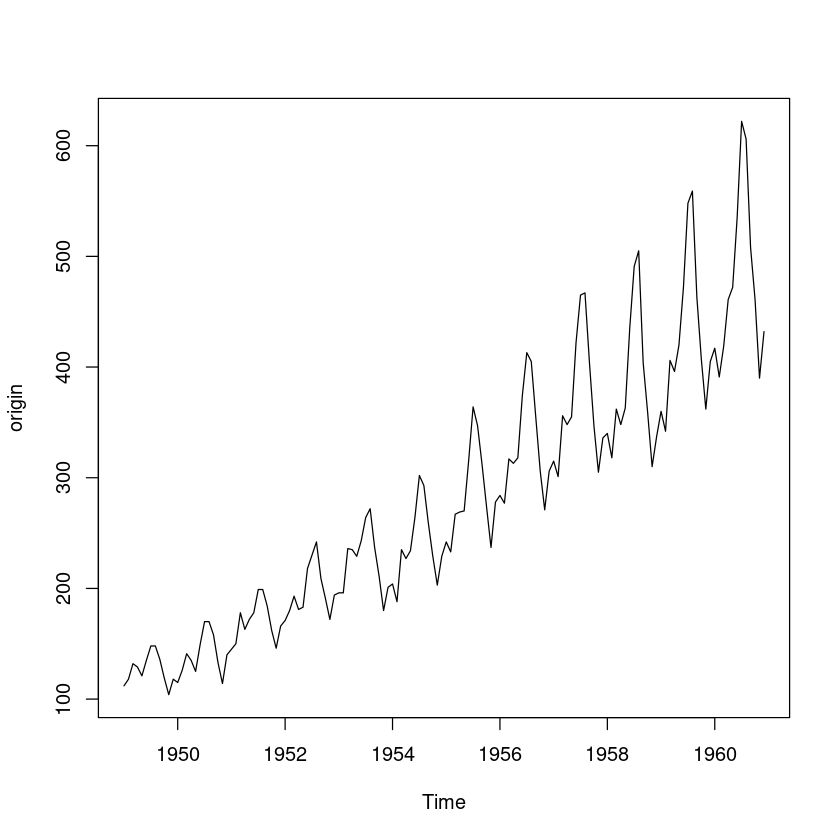

In [75]:
# 시도표
plot(origin)
# 데이터에 이분산이 존재함을 확인일 수 있음
# 분산 안정화를 위한 데이터 변환 필요

- 추세와 계절성과 이분산성이 있는 비정상시계열
- 분산을 맞춰주는 것이 우선

<div class="alert alert-block alert-success">
<b>질문:</b> 계절성과 이분산성도 있는데 왜 분산먼저 맞춰줘야 할까?
</div>

In [130]:
BoxCox.lambda(origin)

[1] -0.2947156

In [20]:
head(tran_org)

,Jan,Feb,Mar,Apr,May,Jun
1949,2.548484,2.561375,2.588408,2.582937,2.567506,2.593720


In [17]:
head(log(origin))

,Jan,Feb,Mar,Apr,May,Jun
1949,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275


### Box-Cov 변환

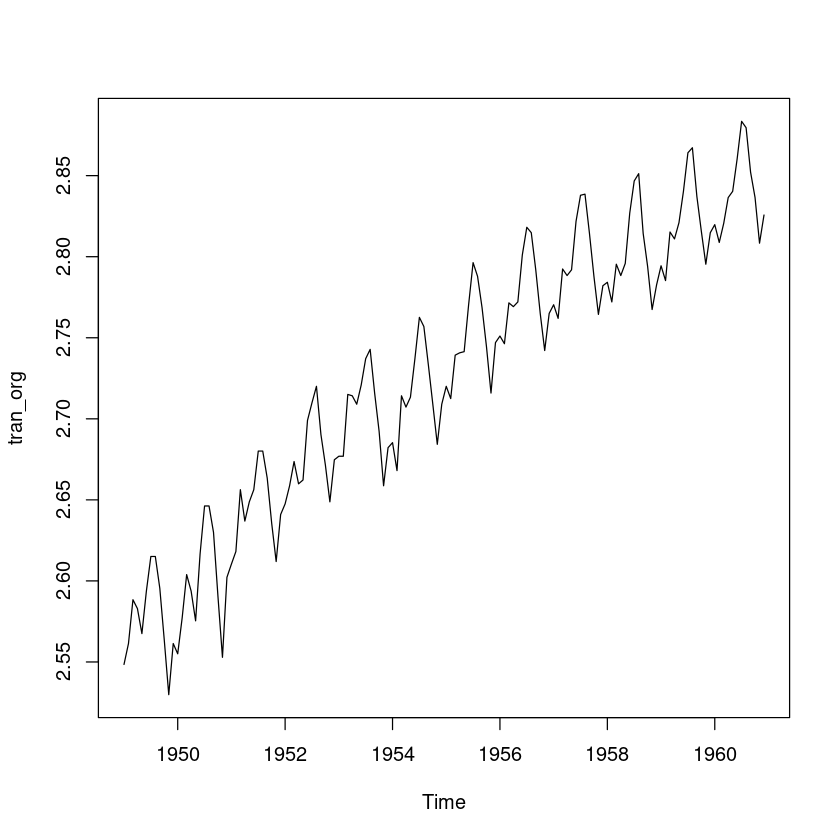

In [131]:
#분산 안정화를 위한 BoxCox 변환
lambda <- BoxCox.lambda(origin)
tran_org <- BoxCox(origin, BoxCox.lambda(origin))
plot(tran_org)
# BoxCox 변환 이후 이분산의 효과가 줄어 든것을 확인

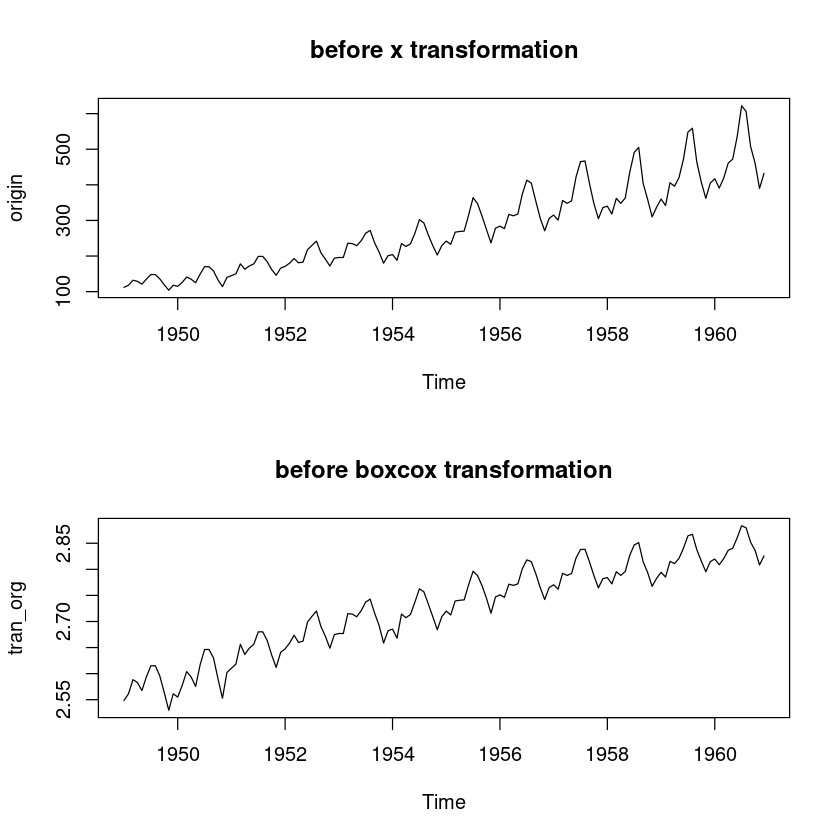

In [135]:
par(mfrow=c(2,1))
plot(origin, main='before x transformation')
plot(tran_org, main='before boxcox transformation')

- 이분산 효과는 줄어들었지만 아직 추세와 계절성은 남아있습니다.

### 정규성 확인

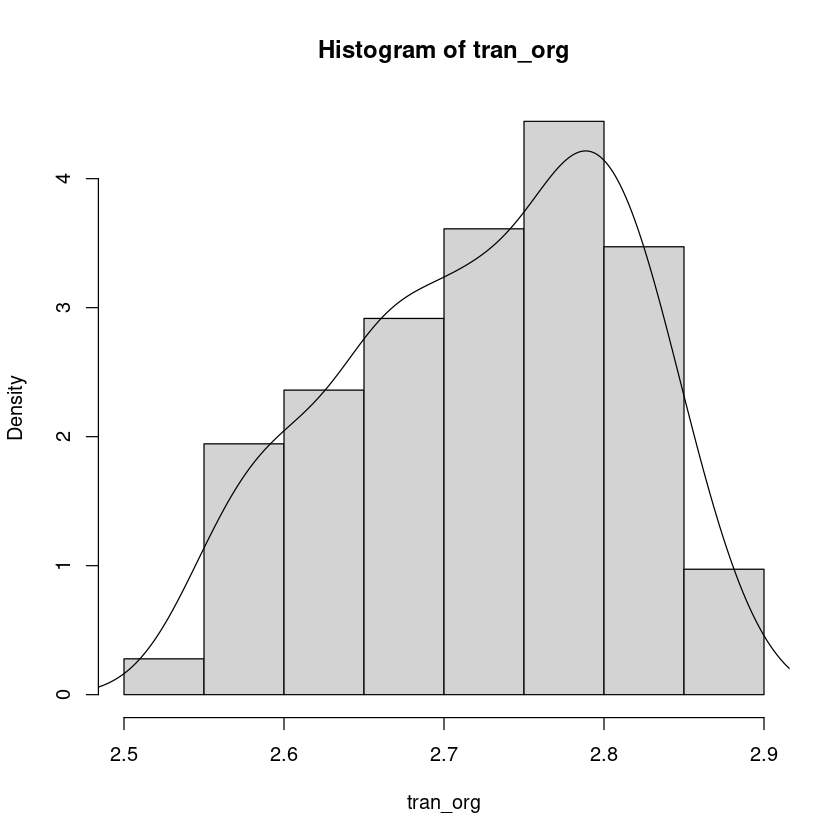

In [95]:
# 정규성 및 Corr
# Hist Plot
hist(tran_org,prob=TRUE,12)
lines(density(tran_org))

- 보기에는 정규분포를 따르지 않는 것 같은데.. 그림으로만 판단해야 하나?

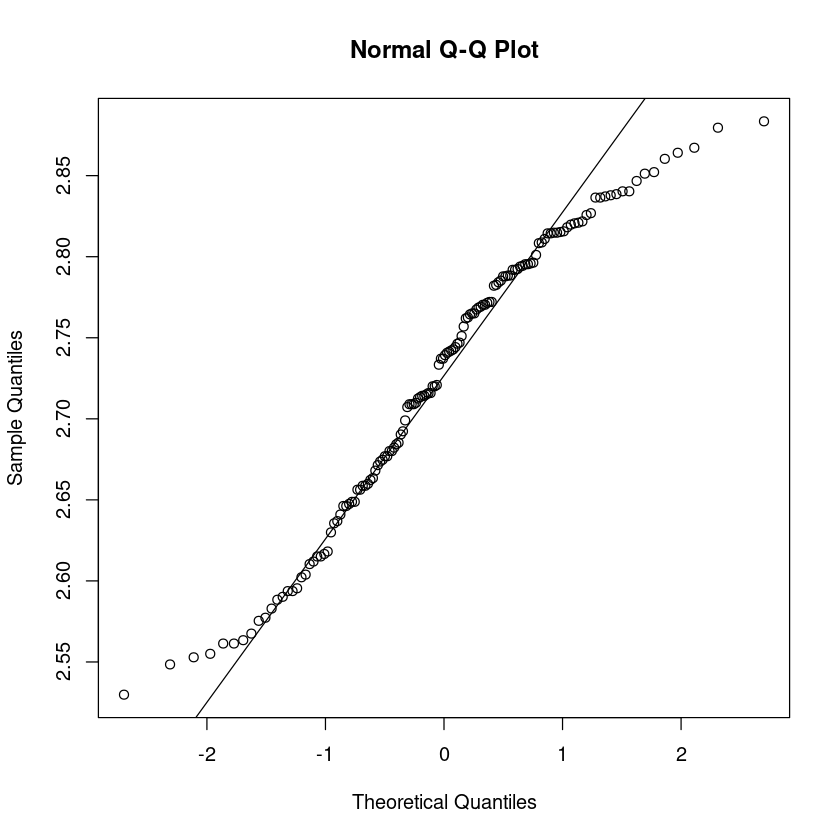

In [96]:
# Q-Q PLOT
qqnorm(tran_org)
qqline(tran_org)

### Correlation

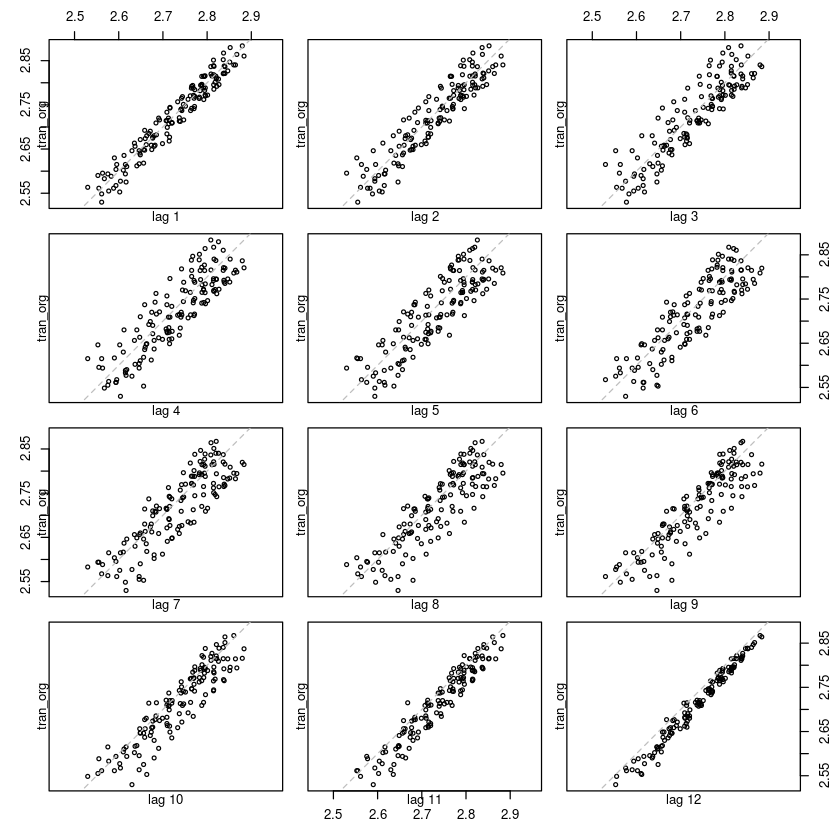

In [97]:
# 상관관계 확인
lag.plot(tran_org,12,do.lines=FALSE)
#전반적으로 데이터는 정규분포를 따르고 시차가 12일때 상관관계가 높음

원자료와 시차가 1일때의 산점도, 원자료와 시차가 2일때의 산점도.. 이런걸 보는건데 

In [99]:
n = length(tran_org)
lag = 1
corrs <- c()
for (lag in 1:15){
    corrs[lags] <- cor(tran_org[1:(144-lag)],tran_org[(1+lag):144])
}

ERROR: Error in corr[lags] <- cor(tran_org[1:(144 - lag)], tran_org[(1 + lag):144]): invalid subscript type 'closure'


# 01. 시계열 분해 및 회귀분석 이용 예측

$y_t = season_t + trend_t + noise$

와 같다고 가정해봅시다.

여기서 우리가 ARMA를 통해서 맞출 수 있는 것은 noise 뿐.

season + trend가 있으면 non-stationary timse serise이므로 ARMA로 분석X

- trend를 제거하기위해서는 차분이 사용
- season을 제거하기 위해서는 계절차분을 사용
- 그런데 분해방법을 이용하면, 차분과 계절차분을 쓰지 않고도 season  trend를 제거할 수 있음.

- 가법모형: 계절 요인의 분산이 일정할 때
    - 모형식: $Z_t = T_t + C_t + S_t + l_t$
- 승법모형: 계절 요인의 분산이 달라짐
    - $Z_t = T_t\cdot C_t \cdot S_t \cdot l_t$

가법은 더하는 거고 승법은 곱하는 거다.

$y_t = Season_t + Trend_t + noise$

In [23]:
#분해법 : 가법모형 
stl_tran_org <- stl(tran_org, s.window = 12)

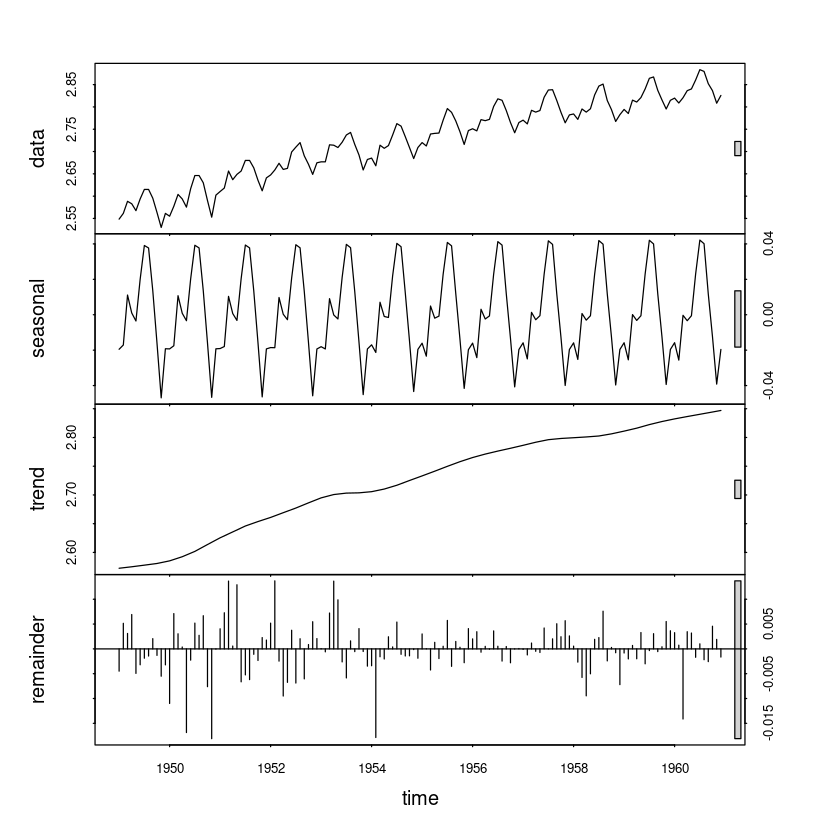

In [24]:
plot(stl_tran_org)
# 1차 Trend와 Seasonality 존재
# 잔차는 White Noise로 판단

회귀분석에서 잔차라고 생각, 리메인더 (확률과정이 될수도 화이트 노이즈가..될수도있지만 여기서는 알 수가 없습니다.)

여기서 remainder는 회귀분석에서 잔차라고 생각하시면 됩니다. 원자료에서 trend와 seasonal을 제외한 무언가..

- 추세(trend) : 시간의 흐름에 따라 일정하게 증가하거나 감소한다.
- 계절성: 1분기마다 뭐가 높거나 나다 혹은 4분기마다.. 1년마다...
- 불규칙성분: 설명되지 않는 오차항

In [25]:
# 회귀모형 
# 계절형 Dummy 변수 생성
M <- factor(cycle(tran_org))
M

[1] 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1 
 [26] 2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2 
 [51] 3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3 
 [76] 4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4 
[101] 5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5 
[126] 6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12
Levels: 1 2 3 4 5 6 7 8 9 10 11 12

- 여기서 cycle은 월을 뽑아내는 함수라고 했죠?

In [26]:
stl_tran_org_df <- as.data.frame(stl_tran_org$time.series)
head(stl_tran_org_df)

,seasonal,trend,remainder
,<dbl>,<dbl>,<dbl>
1,-0.0195009846,2.572470,-0.004485195
2,-0.0170966571,2.573324,0.005147320
3,0.0111248690,2.574178,0.003105273
4,0.0009896123,2.575032,0.006915958
5,-0.0035318860,2.575972,-0.004933871
6,0.0200103731,2.576911,-0.003201882


`-` $\text{tran_org} = \text{trend}\times \beta_1 + M1\times d1 + \dots M 12\times d12 + \epsilon$

In [27]:
# 회귀 모형 생성
# 모형식 : tran_org=trend∗β1+M1∗d1+...+M12∗d12+ϵ
# 가변수를 회귀모형에 넣을 때는 절편을 포함하는 것과 포함하지 않는 것에 대한 회귀계수 의미가 달라짐을 유의
model_stl <- lm(formula = tran_org~0+ stl_tran_org_df$trend+M, na.action = NULL)
summary(model_stl)


Call:
lm(formula = tran_org ~ 0 + stl_tran_org_df$trend + M, na.action = NULL)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0208982 -0.0030056  0.0003675  0.0032375  0.0186285 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
stl_tran_org_df$trend  1.003132   0.006557 152.982  < 2e-16 ***
M1                    -0.025890   0.017899  -1.446  0.15043    
M2                    -0.029141   0.017911  -1.627  0.10614    
M3                    -0.002850   0.017923  -0.159  0.87389    
M4                    -0.009503   0.017936  -0.530  0.59713    
M5                    -0.010617   0.017948  -0.592  0.55519    
M6                     0.012901   0.017961   0.718  0.47386    
M7                     0.032071   0.017974   1.784  0.07669 .  
M8                     0.030402   0.017986   1.690  0.09335 .  
M9                     0.004045   0.017998   0.225  0.82255    
M10                   -0.023032   0.018011  -1.279  0.20322    
M11          

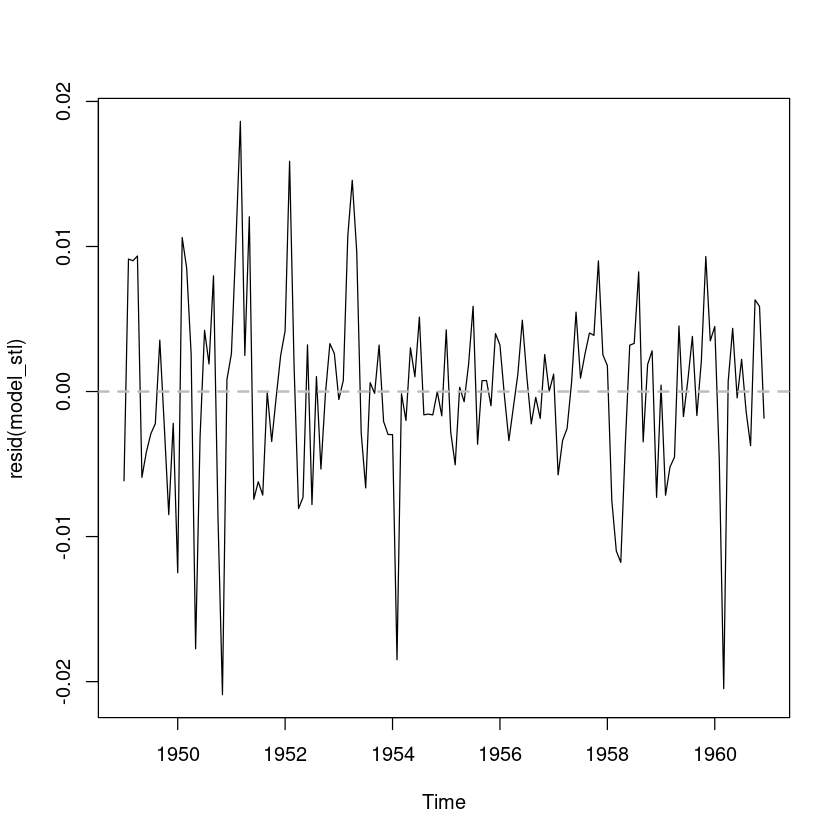

In [28]:
# 잔차 검정
# time Plot
plot(resid(model_stl))
abline(h=0, col='grey', lty=2, lwd=2)

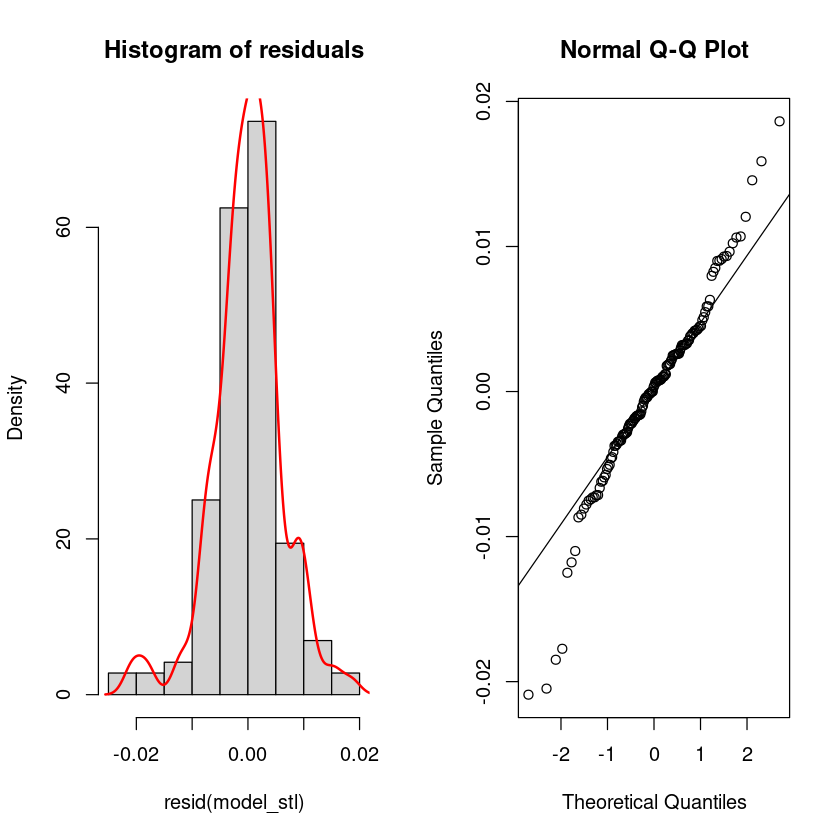

In [29]:
par(mfrow=c(1,2))
# Hist Plot
hist(resid(model_stl),prob=TRUE,12, main = "Histogram of residuals")
lines(density(resid(model_stl)), col='red', lwd=2)

# Q-Q PLOT
qqnorm(resid(model_stl))
qqline(resid(model_stl))
par(mfrow=c(1,1))
# Q-Q Plot과 Histogram을 확인하면 양쪽 끝이 두텁

In [30]:
shapiro.test(resid(model_stl))


	Shapiro-Wilk normality test

data:  resid(model_stl)
W = 0.96352, p-value = 0.0007077


In [31]:
# 잔차들간의 상관관계가 존재하는가에 대한 가설 검정 : DW test
library(lmtest)
dwtest(model_stl) #가설검정 결과 잔차들간의 1차 상관관계가 존재 : White noise 라고 할 수 없음.


	Durbin-Watson test

data:  model_stl
DW = 1.4677, p-value = 0.001001
alternative hypothesis: true autocorrelation is greater than 0


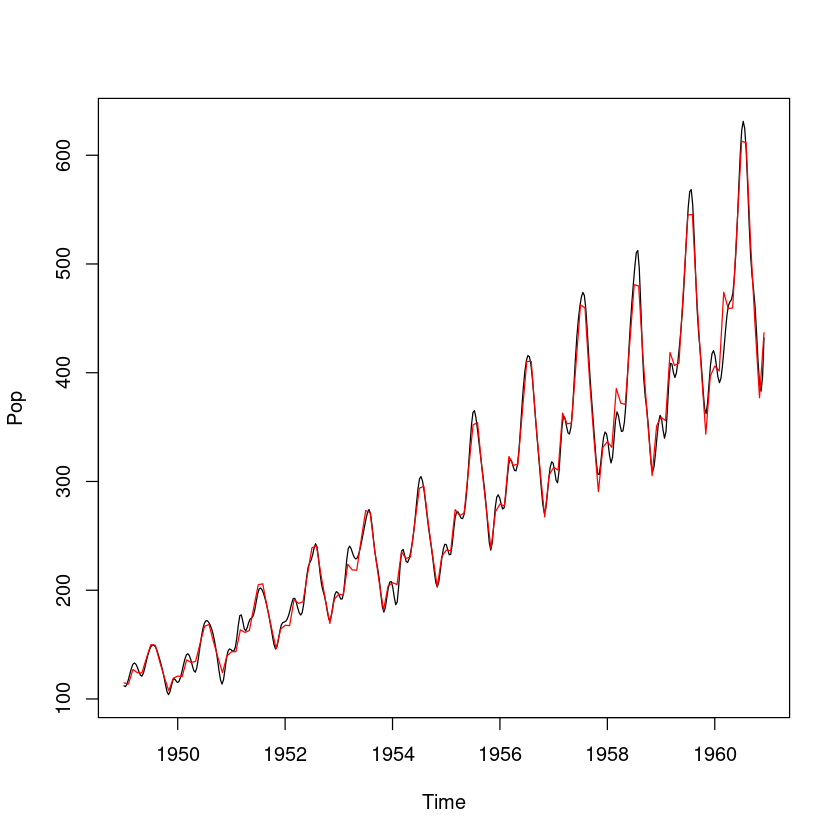

In [32]:
# 회귀모형 예측 결과 확인
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop') 

# 원 데이터 및 fitted 데이터의 비교
# BoxCox 역변환 필요 함
lines(InvBoxCox(model_stl$fitted.values, lambda = BoxCox.lambda(origin)), col='red')

In [33]:
mean((origin - InvBoxCox(model_stl$fitted.values, lambda = BoxCox.lambda(origin)))^2, na.rm = TRUE)  #MSE

[1] 81.14211

<div class="alert alert-block alert-warning">
<b>주의:</b> Box-Cox로 변수변환을 해주었으면 역변환을 반드시 해야해! 마치 회귀분석에서 종속변수에 대해 로그변환을 했을 때 최종 예측 혹은 평가할 때 exp을 취해주는 것 처럼! 우리는 $\log(y)$가 궁금한게 아니라 $y$가 궁금해..
</div>

`-` 다른 방법의 회귀모형

In [34]:
# 다른방법의 회귀모형

t <- 1:length(origin)
model_t <- lm(formula = tran_org~ t +M, na.action = NULL)
summary(model_t) 
# model_stl 에서는 trend에 해당하는 회귀계수가 1에 가까웠는데, 
# model_t에서는 t 에 해당하는 회귀계수가 2.563 으로 trend값과 거의 유사하다. 
# 이렇게 시계열 모형을 적합할 때 회귀모형을 적합해도 되지만, 
# 이 경우 회귀모형에서의 모형 가정이 깨지게 되며 (오차의 독립성)
# 최소제곱합에 의해 구해진 회귀계수의 추정량이 더이상 베스트가 아니게 된다. (분산이 커질 수 있음)
# 따라서 시계열 데이터에 대해 회귀모형으로 적합하는 것은 적절하지 않음.


Call:
lm(formula = tran_org ~ t + M, na.action = NULL)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036966 -0.012087  0.002366  0.012002  0.030970 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.563e+00  4.718e-03 543.342  < 2e-16 ***
t            1.992e-03  2.979e-05  66.862  < 2e-16 ***
M2          -3.329e-03  6.046e-03  -0.551 0.582797    
M3           2.288e-02  6.046e-03   3.785 0.000233 ***
M4           1.615e-02  6.046e-03   2.672 0.008510 ** 
M5           1.499e-02  6.047e-03   2.478 0.014474 *  
M6           3.845e-02  6.048e-03   6.358 3.13e-09 ***
M7           5.757e-02  6.048e-03   9.518  < 2e-16 ***
M8           5.581e-02  6.049e-03   9.226 6.29e-16 ***
M9           2.937e-02  6.050e-03   4.854 3.38e-06 ***
M10          2.206e-03  6.052e-03   0.365 0.716031    
M11         -2.687e-02  6.053e-03  -4.440 1.89e-05 ***
M12         -3.217e-03  6.055e-03  -0.531 0.596147    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘

<div class="alert alert-block alert-success">
<b>의문?:</b> 두 모델 다 계절(월)을 더미화 시켜서 집어넣었는데 model_t에는 M1이 없고 M2에는 있을까? 가변수는 (범주개수-1) 만큼 생성되는데..?
</div>

In [35]:
summary(model_stl) # trend의 회귀계수 1에 가까움.


Call:
lm(formula = tran_org ~ 0 + stl_tran_org_df$trend + M, na.action = NULL)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0208982 -0.0030056  0.0003675  0.0032375  0.0186285 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
stl_tran_org_df$trend  1.003132   0.006557 152.982  < 2e-16 ***
M1                    -0.025890   0.017899  -1.446  0.15043    
M2                    -0.029141   0.017911  -1.627  0.10614    
M3                    -0.002850   0.017923  -0.159  0.87389    
M4                    -0.009503   0.017936  -0.530  0.59713    
M5                    -0.010617   0.017948  -0.592  0.55519    
M6                     0.012901   0.017961   0.718  0.47386    
M7                     0.032071   0.017974   1.784  0.07669 .  
M8                     0.030402   0.017986   1.690  0.09335 .  
M9                     0.004045   0.017998   0.225  0.82255    
M10                   -0.023032   0.018011  -1.279  0.20322    
M11          

# 02. 지수평활을 이용한 예측

- **단순 지수 평활** : **<font color='grey'>추세나 계절적 변동이 없는 시계열</font>** 예측에 사용
- **이중 지수 평활** : **<font color='blue'>추세만</font>** 존재하는 시계열 예측에 사용 
- **HoltWinters** : **<font color='blue'>추세</font>** 와 **<font color='red'>계절 요인</font>** 이 있는 시계열 예측에 사용.
    - 이중 지수 평활을 확장한 개념으로 특정 기간 내의 계절성을 함께 고려 가능 (추세,순환, 계절성을 고려하여 시계열 예측을 하니  당연히 평활모수가 3개가 되는것 $\alpha, \gamma, \beta$) 그럼 이러한 알파,베타,감마라는 가중치가 적용됨.

알 평균 스무딩, 베타: 추세 스무딩, 감마: 계절성분 스무딩

**함수 설명**

- `stl` : 시계열 자료를 계절, 추세, 불규칙 요소로 분해하는 함수 
    - Seasonal Decomposition of Time Series by Loess의 약자.

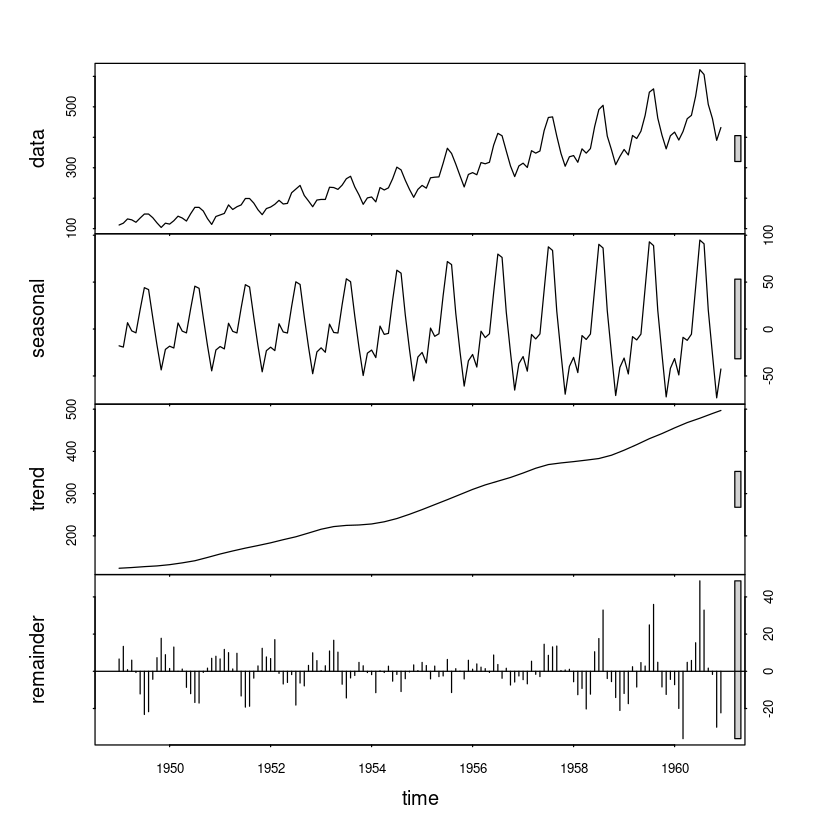

In [36]:
plot(stl(origin, s.window=12))
# Trend 및 Seasonality 존재
# Holt-Winter 지수평활 모형이 적합

- 원자료 데이터
- 계절성: 어떠한 주기마다 반복되는 패턴
- trend: 시간에 따라 일정하게 증가/감소하는 추세
- 어떠한 불규칙 성분, 오차항을 뜻한다

In [100]:
#HoltWinters 모형 생성 (이분산이 있을 때 승법) --origin
model_es <- HoltWinters(origin, seasonal = "multiplicative") # multiplicative : 승법 # es: exponential smoothing 약자.

In [ ]:
# ?HoltWinters 설명 필수...

In [102]:
# model_es

- $1$로 갈수록 어떤 평활모수가 커질수록 최근 관측값에 더 많은 가중치를 두는 것
- $0$으로 갈수록 과거 관측값에 더 많은 가중치를 두는 것.

- $\alpha$ : 시계열 크기
- $\beta$ : 기울기 (추세가중치) --> 0에 가까우니까 과거 관측치에 더 많은 가중치
- $\gamma$: 

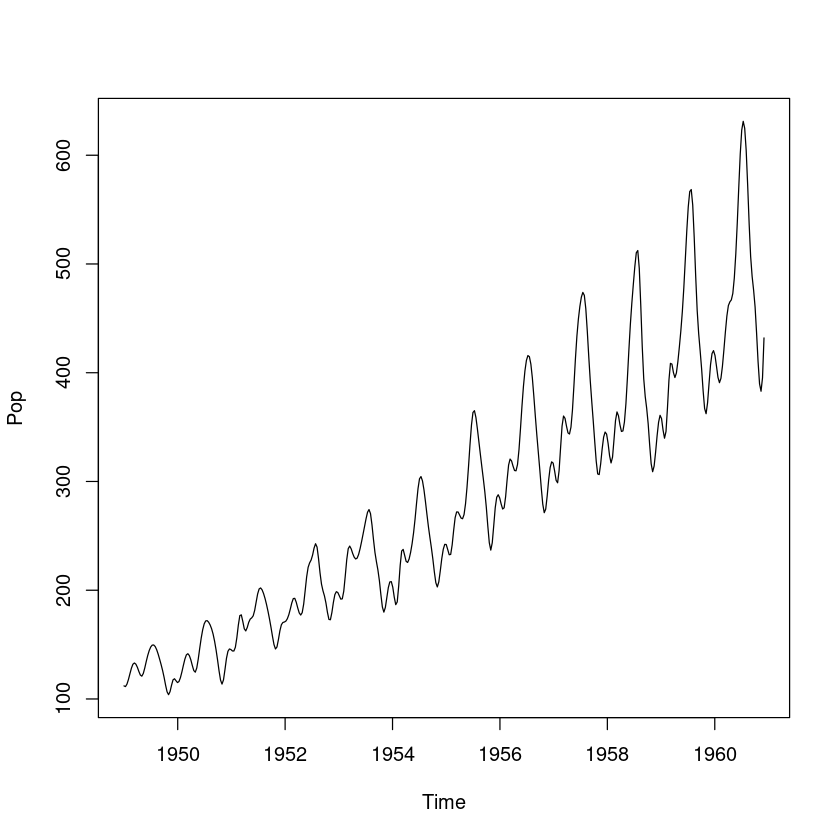

In [39]:
plot(spline(time(origin), origin), type='l', xlab='Time', ylab='Pop')

- `splien` 은 더 부드럽게 보이기 위해서? (spline 보간법)

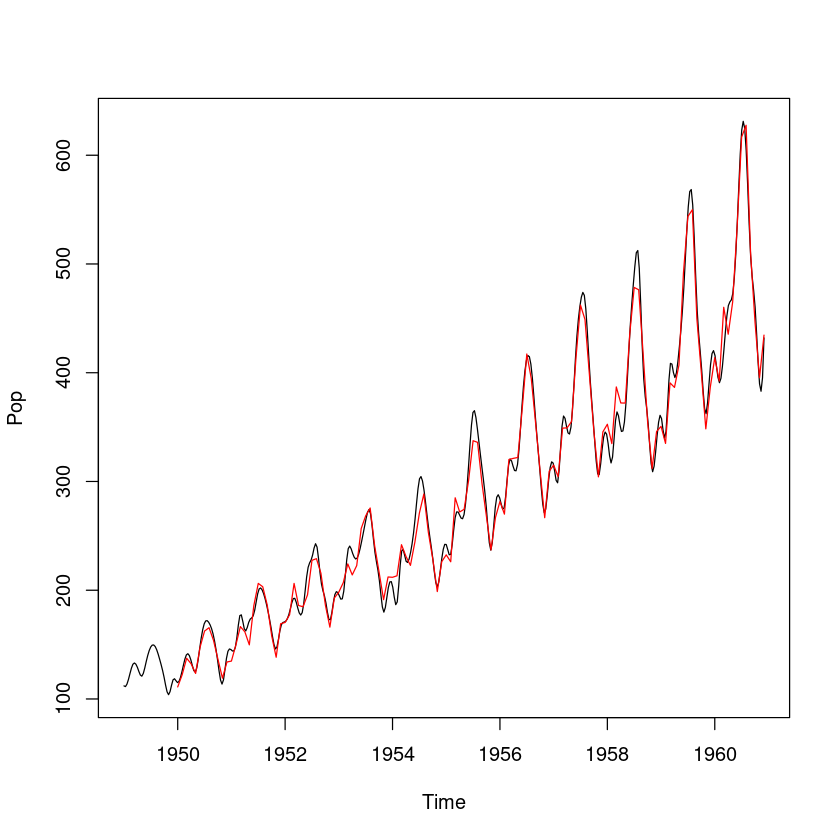

In [40]:
# 원 데이터 및 fitted 데이터의 비교
# plot
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop')
lines(model_es$fitted[,1], col='red')

- 추세뿐만 아니라 계절성까지 고려해서 이런식으로 잘 적합되었다. 원래 데이터랑 비슷하게 간다.

In [41]:
# mse 125.5
mean((origin-model_es$fitted[,1])^2)

[1] 125.5362

### 이동평균법

- $MA(q)$: 유한차수 MA는 정상시계열이다. --> XXXX (아님)

스무딩하는 한 방법... (직전 5일치를 가지고 다음날을 예측해줘.. 윈도우 이동)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,NA,NA,NA,NA,NA,NA,NA,NA,NA,129.8,129.0,129.0
1950,127.3,127.0,129.0,129.0,126.7,126.8,130.2,135.3,140.7,142.2,142.1,143.5
1951,143.9,145.4,150.7,152.1,152.3,153.1,157.2,163.8,170.8,173.0,173.1,174.7
1952,174.0,175.7,177.8,178.1,176.5,178.4,183.0,191.0,197.3,199.8,199.9,201.3
1953,201.6,203.1,208.4,210.1,210.0,210.1,215.6,223.7,230.2,231.9,230.3,230.8
1954,227.6,222.9,223.5,221.9,218.9,218.1,224.6,232.8,240.7,243.5,243.4,247.5
1955,248.2,248.8,252.1,252.6,249.4,251.6,262.1,273.9,284.8,289.3,288.8,293.3
1956,295.0,295.8,300.5,300.3,295.7,298.4,308.5,321.6,333.4,336.2,334.9,337.8
1957,337.6,336.4,340.2,337.6,331.8,333.5,344.5,360.6,373.9,378.0,377.0,380.5
1958,378.9,375.9,376.6,369.2,359.0,355.8,364.5,380.3,390.2,392.5,389.5,391.4


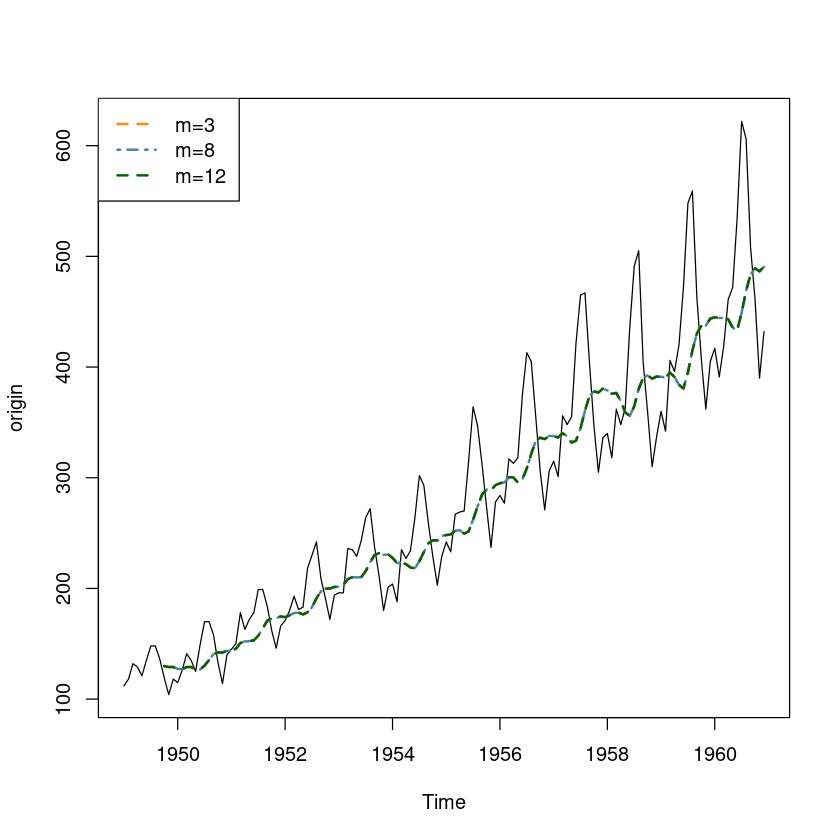

In [115]:
# 이동평균법 사용 방법
plot(origin)

library(TTR) #이동평균 SMA 함수 사용하기 위한 패키지 불러오기
originSMA3 <- SMA(origin,m=3) #window=3
originSMA3
lines(originSMA3, col='darkorange', lty=2, lwd=2)

originSMA8 <- SMA(origin,m=8)
lines(originSMA8, col='steelblue', lty=4, lwd=2)

originSMA12 <- SMA(origin,m=12)
lines(originSMA12, col='darkgreen', lty=2, lwd=2)

legend("topleft", c("m=3", "m=8", "m=12"), col=c("darkorange", "steelblue","darkgreen"), lty=c(2,4,2), lwd=2)

- 계절주기랑 같이 쓰게되면(윈도우의 크기가 같아지게되면) 계절성분을 제거할 수 있다.


# 3. ARIMA를 이용한 예측

$Z_t \sim ARIMA(p,d,q)(P,D,Q)_m$

- ARIMA: $d$차 차분을 통해 비정상 시계열을 정상시계열로 변환하여 $\tt ARMA(p,q)$과정 수행
- $\tt{ARIMA}(p,d,q)$ 모형식
$$(1-\phi_1B-\cdots-\phi_pB^p)Z_t(1-B)^d = (1-\theta_1B-\cdots -\theta_qB^q)w_t$$

AR모델과 MA모델을 통합한 모델이다.

AR모델은 과거값이 독립변수로 투입된 것이다. (오늘방문 고객수? 어제 방문한 고객수)

MA모델은 과거의 오차항이 투입이 되었다. (현재시점의 오차항이 있고, 어제오차항이 있을 텐데 어제 오차항까지 고려하겠다.. 라는것)

자기회귀모형과 이동평균 모형을 합친 것을 ARMA모형이라고 하는데 ARMA모델은 과거값이 독립변수로 들어가고 오차항의 과거값이 또 들어간다 이렇게 통합된 모델이라고 보면 된다.

그럼 ARMA랑 ARIMA가 뭐가다른가? 여기서 시계열의 정상성이 문제가 되는것.

시계열이 정상이 될 수도 비정상이 될 수도 있잖아요. 만약 우리가 정상 시계열에 대한 regression을 수행한다고 했을 떄 그냥 ARMA모형을 사용하면 됩니다.

그런데 비정상 시계열을 정상시계열로 차분을 통해서 분석을 했다. 그러니까 차분을 통해서 정상시계열로 만들었다. 차분정상적 시계열이라고 하는데 이런 경우 ARIMA모델을 사용한다. ARMA모델보다 ARIMA 모델을 사용하는 경우가 더 많다.


ARIMA모델을 이해하기 위해서는 AR, MA를 잘 이해를 해야하는데 AR의 차수를 보통 $p$, MA의 차수를 보통 $q$라고 표현한다.

차분정상적 시계열 ARIMA 에 대해 알아봅시다.

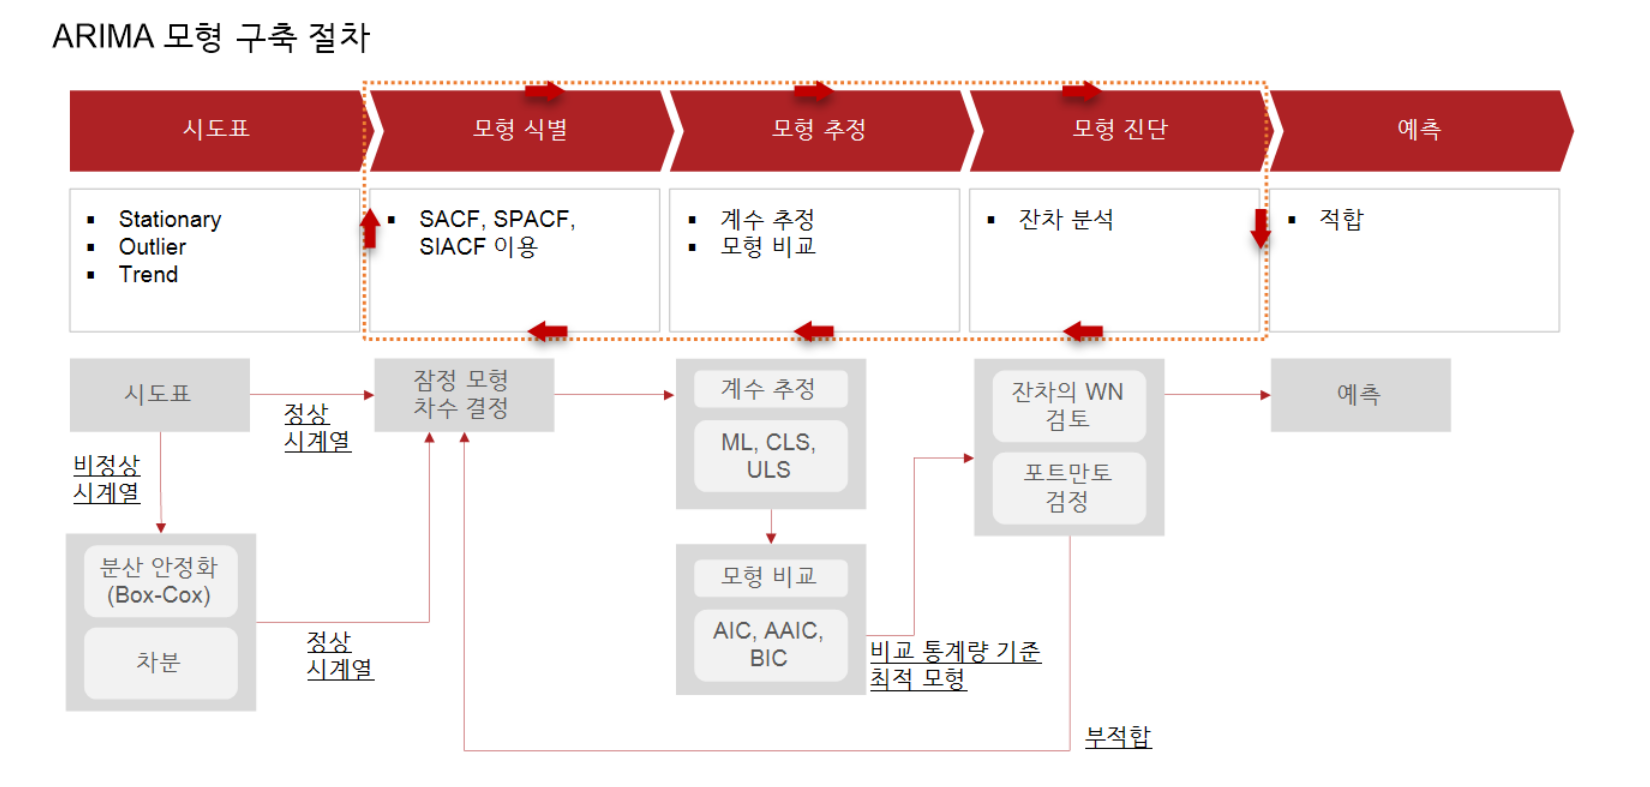

### 계절성 (슬라이드 62)

차분을 통한 정상화

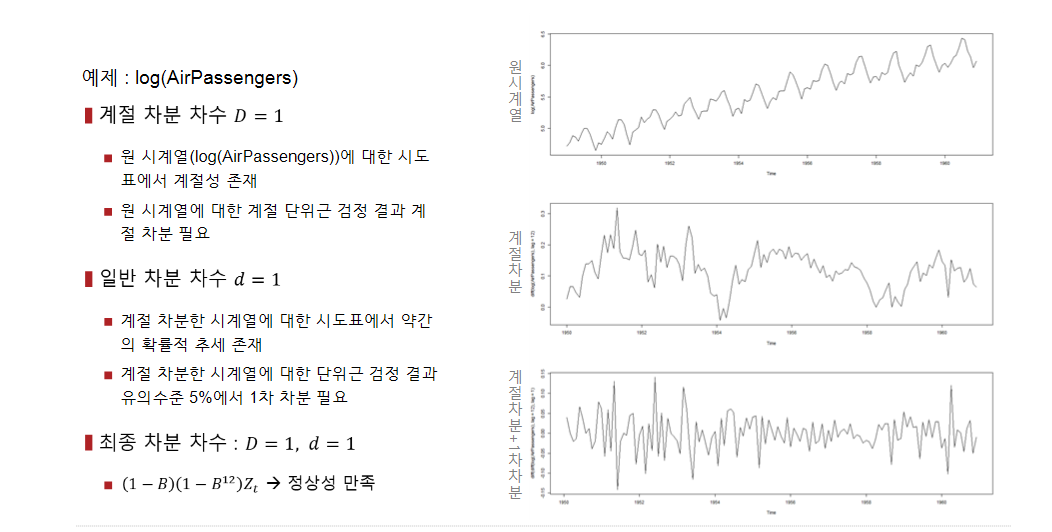

`-` 원계열 데이터

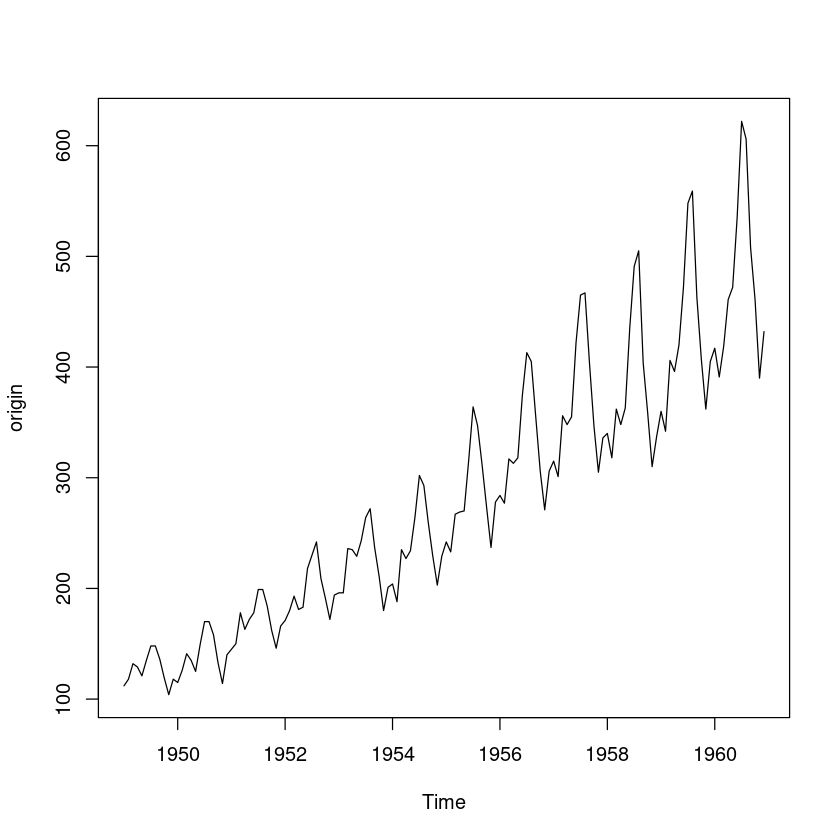

In [111]:
#============================================================
# ARIMA를 이용한 예측
#============================================================

# 데이터 탐색 및 모형식별
# 시도표
plot(origin)
# 데이터의 이분산과 1차 추세가 존재함 (선형 추세)
# 분산 안정화를 위한 Box Cox 변환과 1차 차분 필요

`-` 변수변환을 통한 분산 안정화 (Box-Cox 변환)

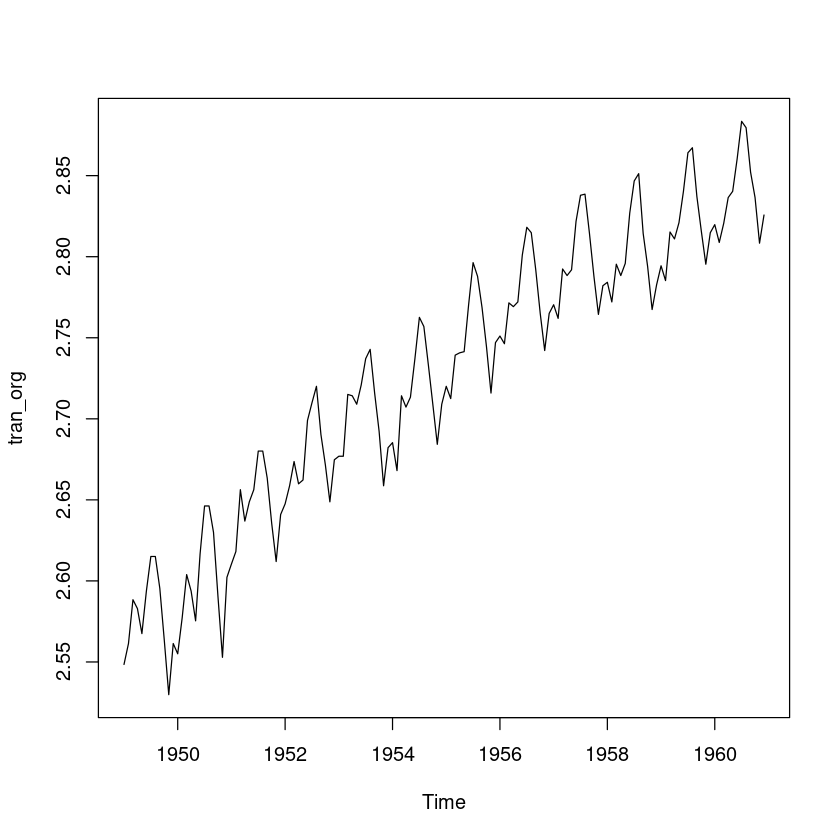

In [44]:
# 분산 안정화 및 차분
tran_org <- BoxCox(origin, BoxCox.lambda(origin))
plot(tran_org)

`-` 1차 차분을 통해 Trend 제거

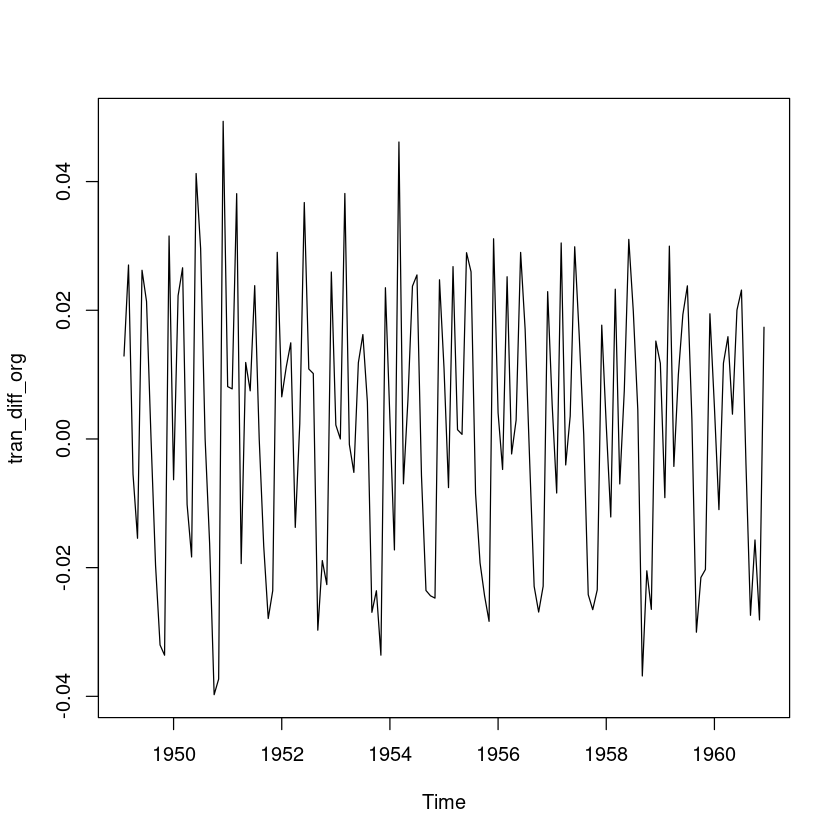

In [45]:
tran_diff_org <- diff(tran_org)
plot(tran_diff_org)

`-` 차수 결정

ACF, PACF를 그려 어떤 모델을 따르는지 예측이 가능하다.

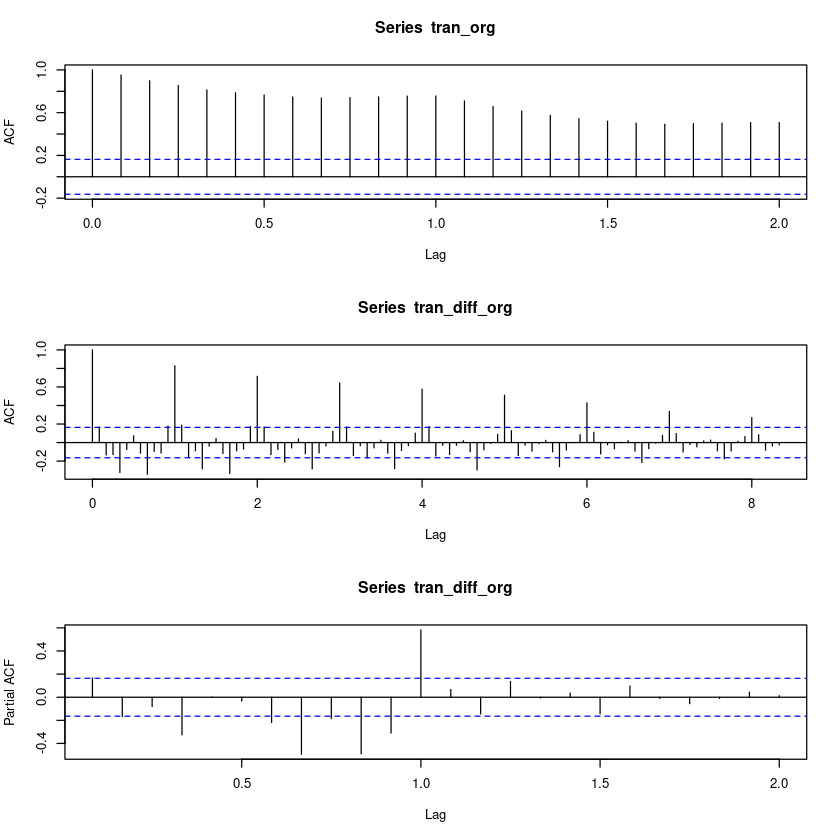

In [120]:
# ACF, PACF를 통한 탐색
layout(1:3)
acf(tran_org, lag.max = 24) # 차분이 필요해
acf(tran_diff_org, lag.max = 100) # 계절차분이 필요해 (12배수 에서 천천히)
pacf(tran_diff_org, lag.max=24)

- 계절형은 AR (P=1) 느낌이야..
- ACF가 아주 천천히 감소하면 차분이 필요하다. (계절이든 아니든)
- MA, AR은 찾기 어렵다. ACF, PACF 이론상으로는 가능하지만 실제 데이터에서는 결정하기 어렴다.
- 그런데 auto.arima라고 아주 좋은 함수가 있다!!

강의안에 보면 계절성이 보이면 계절차분을 먼저 한다고 나오잖아요. 그 이유는 계절차분을 하면 차분을 같이 되는 경우?도 있어서 그래~~ 차분을 한다고 계절성이 없어지진 않거든 

In [49]:
# 계절 차분 및 ACF, PACF를 통한 탐색
tran_sdiff_org <- diff(tran_diff_org, lag = 12)

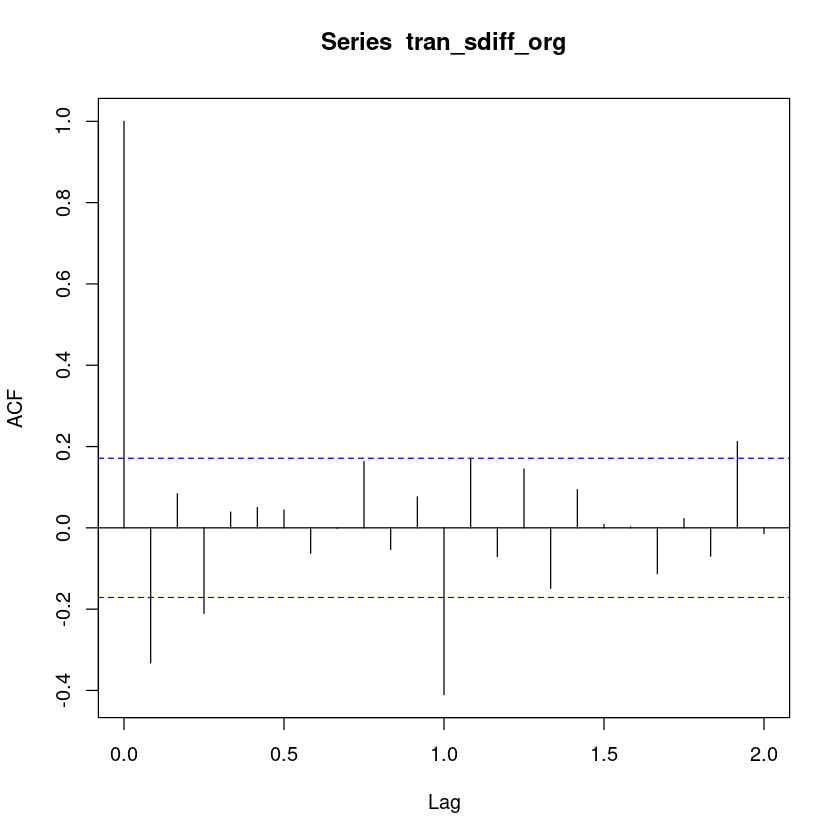

In [50]:
acf(tran_sdiff_org, lag.max = 24) # 차분하고 계절 차분까지 한것.
# acf는 lag=1,3,12에서 0이 아닌값 가짐  비계절 시차 4부터 절단 -> MA(3), 계절 -> 시차 2부터 절단 SMA(1)

- MA의 차수를 보려면 ACF를 보면되고, AR의 차수를 보려면 PACF를 보면된다.

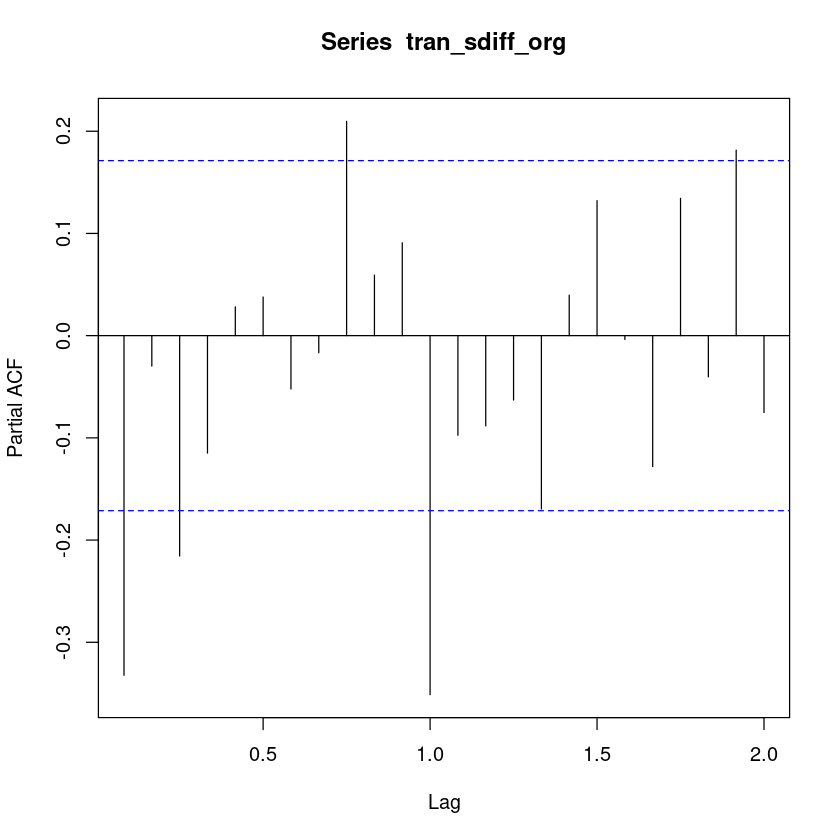

In [112]:
pacf(tran_sdiff_org, lag.max = 24)
# 시차 2와 8에서 0보다 큰 값을 가지지만 정확한 모형을 찾기 위해 

In [52]:
# auto.arima를 통해 aic가 최소가 되는 order 값 구함

auto.arima(tran_sdiff_org, max.p = 3, max.q=3, max.Q=1)
# auto.arima(tran_org, max.p = 3, max.q=3, max.Q=1)

Series: tran_sdiff_org 
ARIMA(0,0,1)(0,0,1)[12] with zero mean 

Coefficients:
          ma1     sma1
      -0.4355  -0.5847
s.e.   0.0908   0.0725

sigma^2 = 5.789e-05:  log likelihood = 451.59
AIC=-897.18   AICc=-896.99   BIC=-888.55

- ma1의 계수는 ~고, sma 계수는 ~야
- AIC, BIC 값이 낮을수록 예측정확도가 높다라고 생각하면 된다. AIC는 얼마고 ,BIC는 얼마야..

In [53]:
auto.arima(tran_org, max.p = 3, max.q=3, max.Q=1)

Series: tran_org 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4355  -0.5847
s.e.   0.0908   0.0725

sigma^2 = 5.855e-05:  log likelihood = 451.6
AIC=-897.19   AICc=-897.01   BIC=-888.57

In [54]:
# 모형 구축
model_arima <- arima(tran_sdiff_org, order=c(0,0,1), seasonal = list(order = c(0,0,1), period = 12))
model_arima <- arima(tran_org, order=c(0,1,1), seasonal = list(order = c(0,1,1), period = 12))

In [55]:
model_arima <- arima(tran_sdiff_org, order=c(0,0,1), seasonal = list(order = c(0,0,1), period = 12))

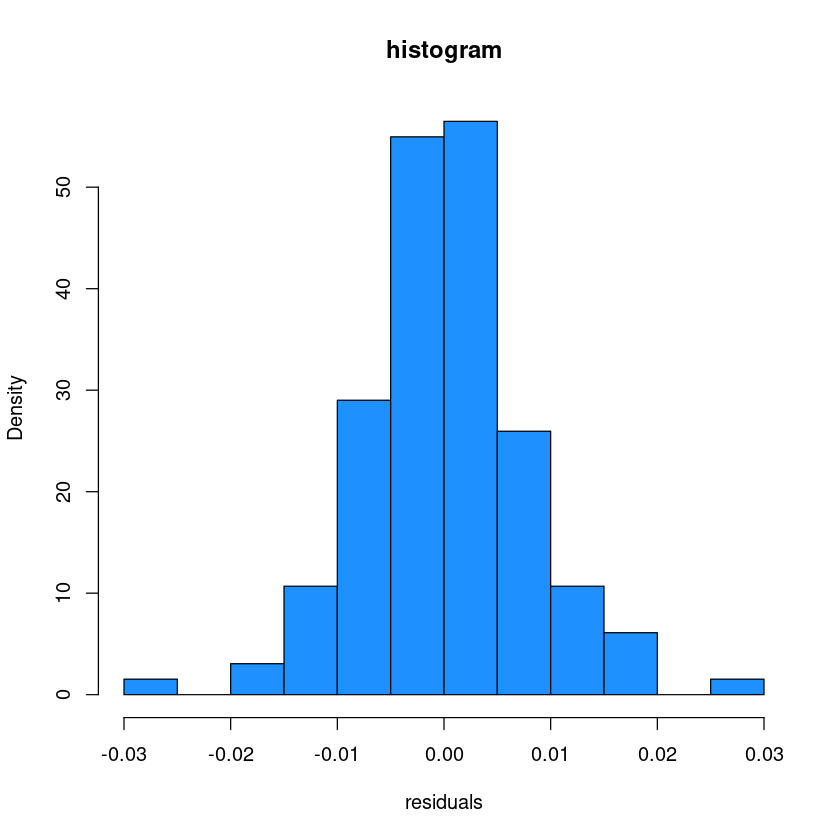

In [56]:
hist(model_arima$residuals,col='dodgerblue', prob=TRUE, main='histogram', xlab='residuals')


	Box-Ljung test

data:  model_arima$residuals
X-squared = 0.22475, df = 1, p-value = 0.6354


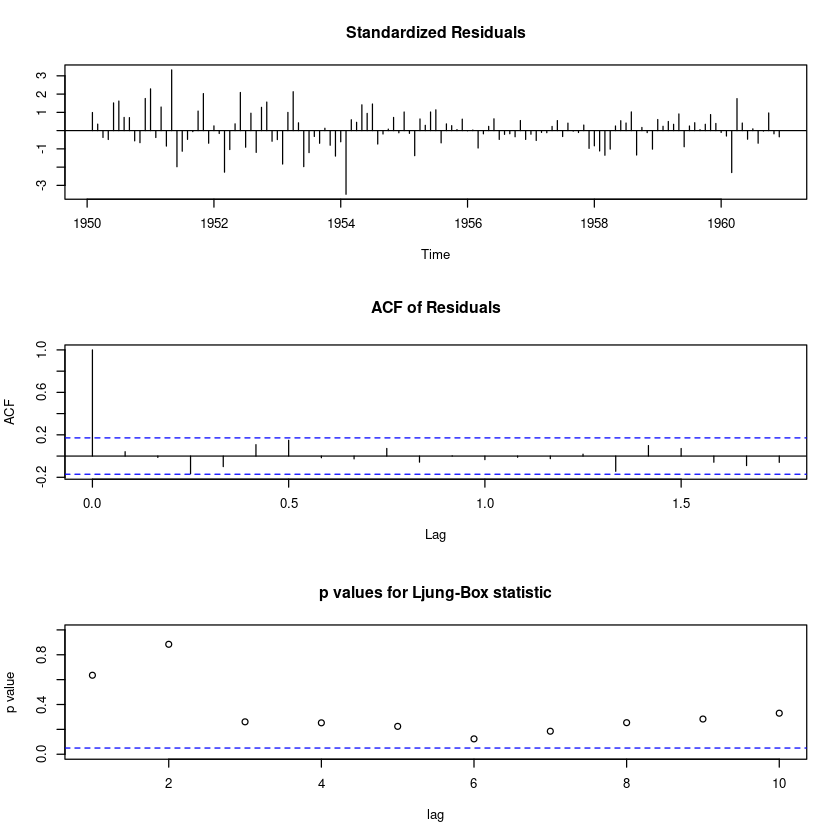

In [57]:
# 모형 검진
# 잔차 검정
tsdiag(model_arima)
# 독립성 검정
Box.test(model_arima$residuals, type="Ljung-Box") # 륭 박스 테스트
# 잔차의 독립성, 독립성, 정규성 만족

- 모든 lag에 대해서 잔차의 자기상관이 0이다.

$\rho(1) = 0$ ,lag=1

$H_0: \rho(1)=\rho(2)=...\rho(k)=0$ lag=k 여기에 대한 p-value (기각X)

$H_0$: 잔차의 자기상관이 없다.

- Box.test는 잔차의 자기상관이 존재하는지 검정.
- 잔차의 과거값과 관련이 있다는 건데 안좋은거지..
- Ljung-Box 검정 결과 잔차에 자기상관이 남아있지 않다.

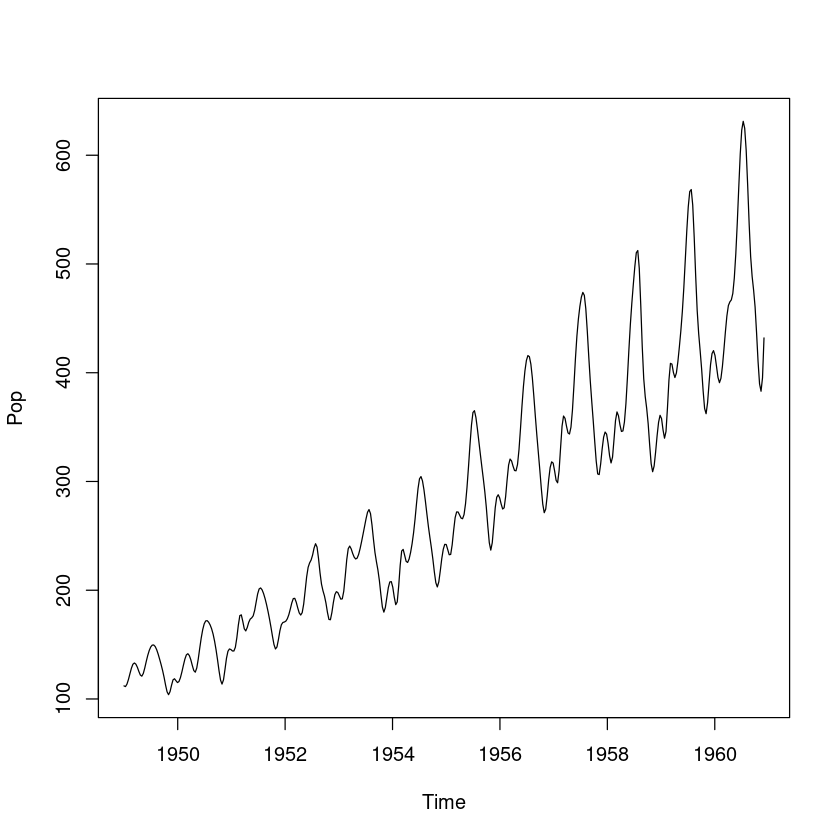

In [63]:
# 원 데이터 및 fitted 데이터의 비교
plot(spline(time(origin), origin),type='l',xlab='Time',ylab='Pop')
lines(InvBoxCox(fitted(model_arima), BoxCox.lambda(origin)), col='red')
mean((origin - InvBoxCox(fitted(model_arima), BoxCox.lambda(origin)))^2)

`-` 12개월 예측

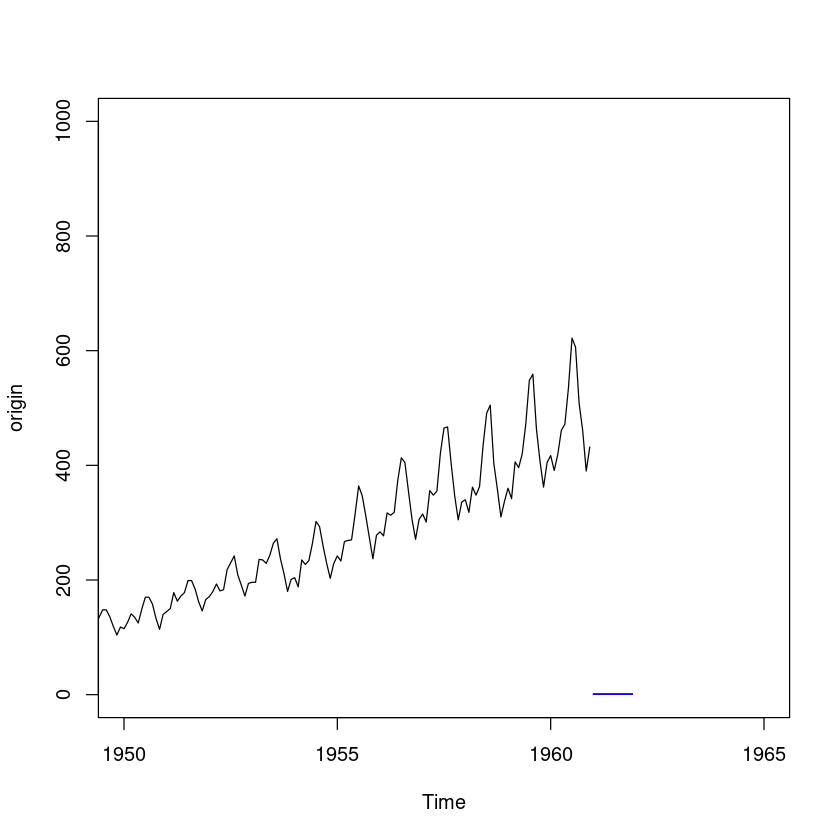

In [59]:
# 12개월 예측
arima_fit <- predict(model_arima, n.ahead=12) #BoxCox 변환 데이터 사용
lambda <- BoxCox.lambda(origin)
ts.plot(origin, xlim=c(1950,1965), ylim = c(0, 1000))
lines(InvBoxCox(arima_fit$pred, lambda),col="red")
lines(InvBoxCox(arima_fit$pred+1.96*arima_fit$se, lambda),col="blue",lty=1)
lines(InvBoxCox(arima_fit$pred-1.96*arima_fit$se, lambda),col="blue",lty=1)

In [60]:
qnorm(0.025, lower.tail = FALSE)

[1] 1.959964

`-` `forecast` 함수로도 예측 가능

In [61]:
arima_fit_ <- forecast(model_arima, h=12) #BoxCox 변환 데이터 사용

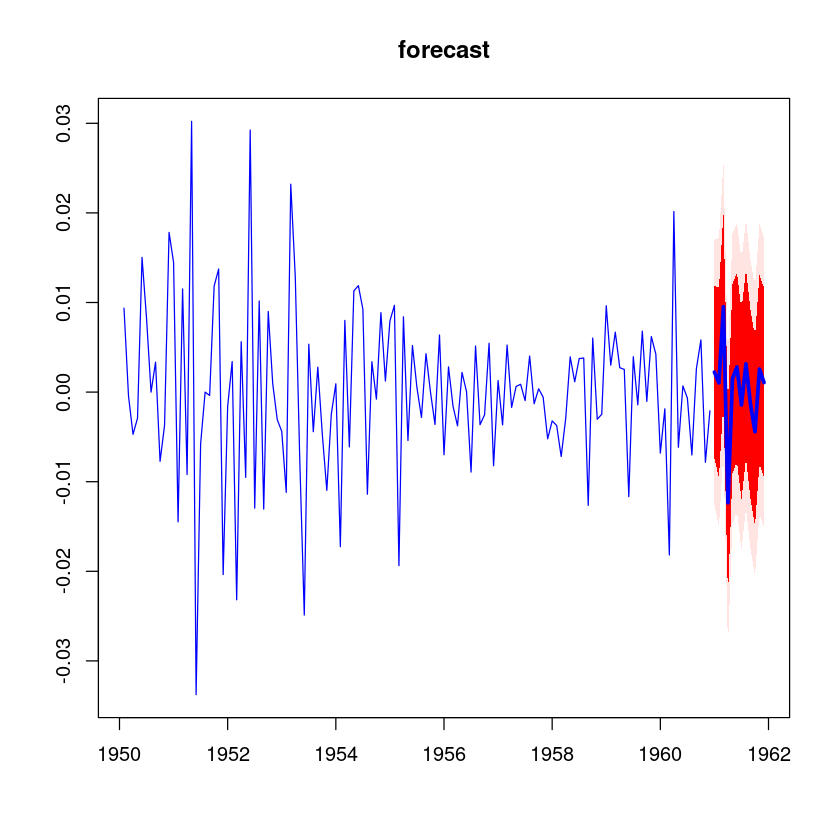

In [62]:
plot(arima_fit_, col='blue', flty=1, flwd=3, fcol='blue', shadecols=c('mistyrose','red'),main='forecast')

- 이쁘게 안나오네...